**[scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html#)**

* author: Rui Zhu
* date: 2024-03-14

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---
# [峰值检测](https://docs.scipy.org/doc/scipy/reference/signal.html#peak-finding)

## scipy.signal.find_peaks

Paramters:  
* x: 一维数组
* height: 峰值高度的范围; 如果输出一个数, 则表示峰值的高度下限; 如果输入一个2个元素的数组, 则表示峰值高度的上下限
* threshold: 相邻峰值的数值高度阈值
* distance: 峰值间距的水平距离
* prominence: 峰值的突出程度的范围
* width: 峰的宽度范围
* 

In [2]:
from scipy.datasets import electrocardiogram
from scipy.signal import find_peaks
x = electrocardiogram()[2000:4000]

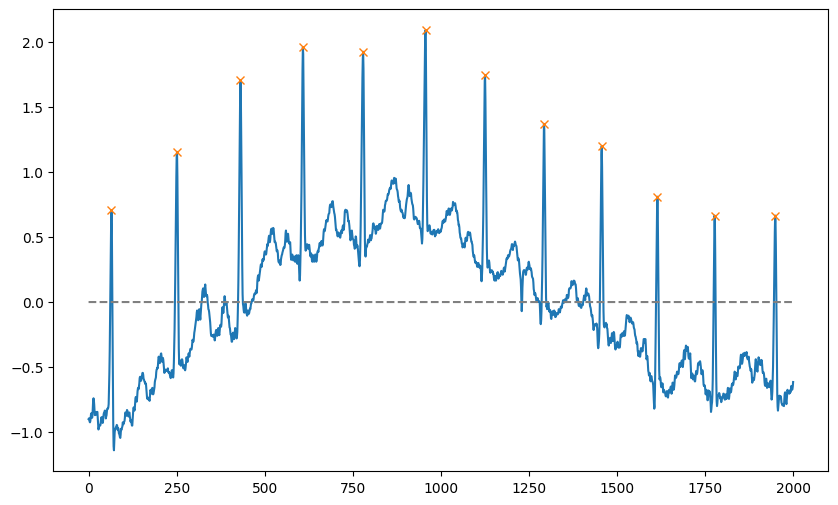

In [3]:
peaks, _ = find_peaks(x, height=0, distance=100)

plt.figure(figsize=(10, 6))
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")

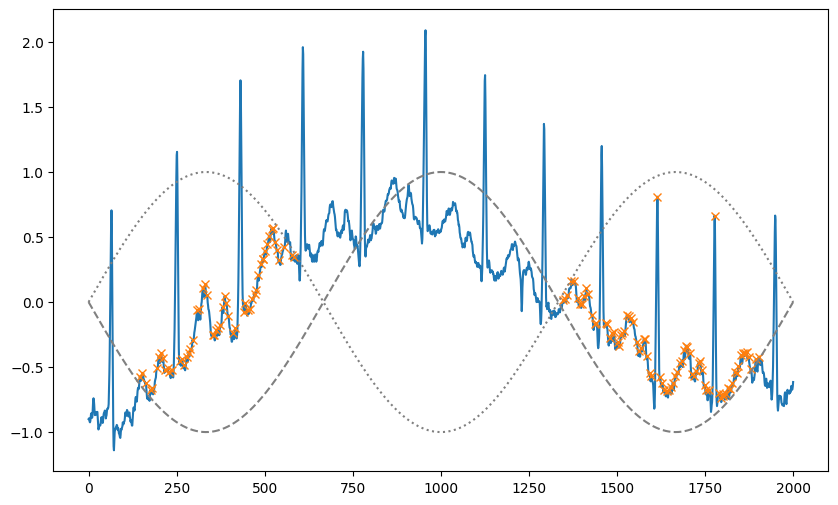

In [4]:
border = np.sin(np.linspace(0, 3 * np.pi, x.size))
peaks, _ = find_peaks(x, height=(-border, border))

plt.figure(figsize=(10, 6))
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(-border, "--", color="gray")
plt.plot(border, ":", color="gray")

[186 180 177 171 177 169 167 164 158 162 172]


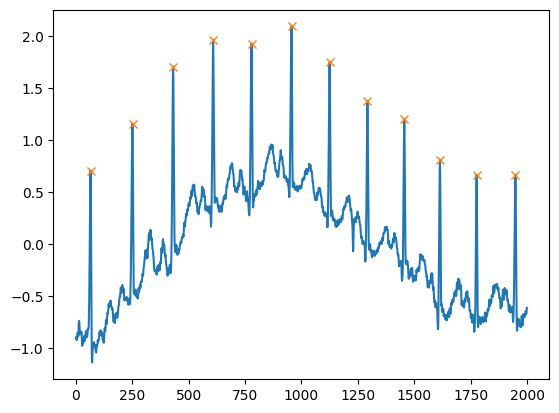

In [5]:
peaks, _ = find_peaks(x, distance=150)
print(np.diff(peaks))

plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

0.5049999999999999


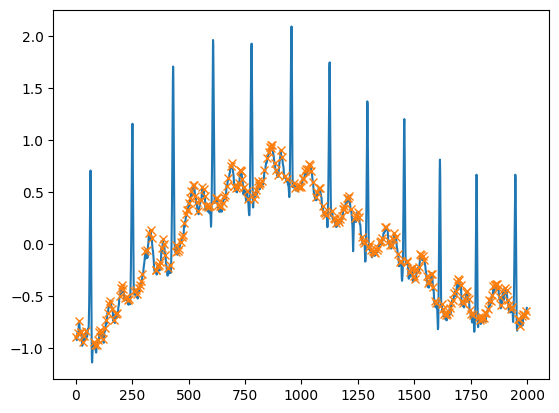

In [6]:
peaks, properties = find_peaks(x, prominence=(None, 0.7))  # 下限为None, 上限为0.7
print(properties["prominences"].max())

plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

[1.495 2.3  ] [36.93773946 39.32723577]


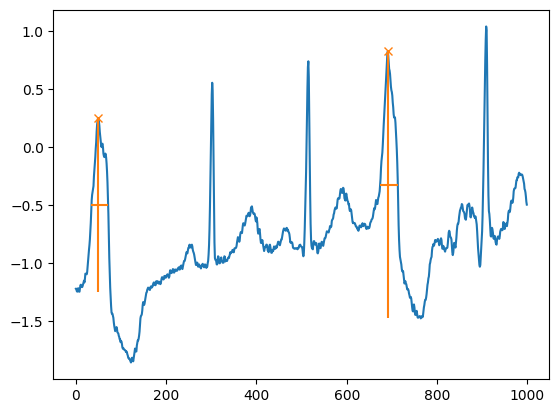

In [8]:
x = electrocardiogram()[17000:18000]
peaks, properties = find_peaks(x, prominence=1, width=20)
print(properties["prominences"], properties["widths"])

plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"],
           ymax = x[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],
           xmax=properties["right_ips"], color = "C1")
plt.show()